<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/est_evaluacion_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 12px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 12px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 12px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
    
    return 'color: %s ; font-size: 8px ; font-weight: lighter' % color 

In [3]:
# Si lo ejecutas desde google colab
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
!pwd
#os.chdir('/content/drive/Curso Actual')



Mounted at /content/drive
/content/drive/My Drive/Curso Actual/4ac/notebooks
/content/drive/My Drive/Curso Actual/4ac/notebooks


In [3]:
# Import data

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False)
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])


evaluaciones_a_incluir = 2

inicio_nombre_fichero = 'importado'


actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
#actilla_final = concatenar_actillas('importado',1)
#actilla_final = actilla()
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
#actilla_final['Nota']=actilla_final['Nota'].astype(int)
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente

#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)
actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)
ultima_evaluacion = actilla_final.Eval.max()

actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)



actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
0,Alumno_1,2FR II,1,8,0
1,Alumno_2,2FR II,1,7,0
2,Alumno_3,2FR II,1,8,0
4,Alumno_1,BI,1,7,0
5,Alumno_2,BI,1,8,0
...,...,...,...,...,...
40,Alumno_1,PSC,2,9,0
44,Alumno_1,QU,2,7,0
45,Alumno_2,QU,2,7,0
46,Alumno_3,QU,2,8,0


In [4]:
###### df = actilla_final.drop(['Suspenso'], axis=1)
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval')

#df2 = df[df.Eval == ultima_evaluacion].groupby('Alumno')[['Nota']].mean().round(1).rename(columns={'Nota': ('Nota',''+str(ultima_evaluacion)+'ev',str(ultima_evaluacion))})

#df2 = df[df.Eval == ultima_evaluacion].groupby('Alumno')[['Nota']].mean().rename(columns={'Nota': ('Nota',''+str(ultima_evaluacion)+'',str(ultima_evaluacion))})

df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'NM'})

df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()


#df3.T.round(1)

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

#df5 = pd.concat([df4,df2], axis=1, sort=False).fillna('-').round(1)

#df5.style.applymap(color_negative_red)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)



# calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-1:,-2:-1]=df2.mean()[0]
df5.iloc[-1:,-1:]=df6.sum()[0]

#df5.style.set_precision(0).format("{:.0f}").format("{:.1f}",subset=(df5.index,df5.columns[-1:])).format("{:.1f}",subset=(df5.index[-1:],df5.columns)).applymap(color_negative_red).highlight_null("white").set_na_rep('-')

actilla_estilada = df5.style.set_precision(0) \
    .format("{:.1f}",subset=(df5.index[-1:],df5.columns[:-1])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .applymap(color_negative_red).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-1:],df5.columns)) \
    .applymap(color_media, subset=(df5.index,['NM'])) \
    .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('text-align', 'center'),('font-size','9px')]}
                      ] \
                     ) \
    .set_na_rep('-')






In [5]:
actilla_estilada

In [5]:
import imgkit
imgkit.from_string(actilla_estilada.render(),'prueba.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [8]:
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = "# Acta de la {}ª evaluación \n ## Informe actilla: \n ![](prueba.png) \n ## Resultados generales: \n".format(ultima_evaluacion)
f.write(texto)
f.close()

In [327]:
def analisis_df(df, txt_intro ="tenemos los siguientes datos: \n ",txt_mejor="Sube {}:", txt_peor="Baja {}:", txt_igual="Se mantiene {}") :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df2.index).index(ultima_evaluacion)
        txt = "En la {}ª evaluación ".format(ultima_evaluacion)+txt_intro
        for c in range(len(df.columns)) :
            if (df2.iloc[ix,c] - df2.iloc[ix-1,c]) > 0 : txt2 = txt_mejor
            elif (df2.iloc[ix,c] - df2.iloc[ix-1,c]) < 0 : txt2 = txt_peor
            else : txt2 = txt_igual              
            txt += txt2.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df2.iloc[ix-1,c]),str(df2.iloc[ix,c]))
            
        
    else :
        txt = "En la 1ª evaluación "+txt_intro
        txt += ", ".join(["{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c])) for c in range(len(df.columns))])
#         for c in range(len(df.columns)):
#             txt += "{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c]))
            
    

    return txt, [df[df.columns[i]] for i in range(len(df.columns))]



In [333]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=df['N_susp']/df['N_al']
df['Media']=df['Media'].round(2)
df



,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,4,7.42,1,0.25
2,4,7.06,2,0.50


In [339]:
df2 = df.rename(columns={'N_al':'el número de alumnos', 'Media':'la nota media', 'N_susp':'el número de suspensos','Susp_alu':'el número de suspensos por alumno'}).iloc[:,1:]


df2

,la nota media,el número de suspensos,el número de suspensos por alumno
Eval,,,
1,7.42,1,0.25
2,7.06,2,0.50


In [340]:
analisis_df(df2)[0]

'En la 2ª evaluación tenemos los siguientes datos: \n Baja la nota media: Pasa de 7.42 a 7.06. Sube el número de suspensos: Pasa de 1 a 2. Sube el número de suspensos por alumno: Pasa de 0.25 a 0.5. '

,Alumnos
0 susp.,3
1 susp.,0
2 susp.,1
3 ó 4 susp.,0
> 4 susp.,0


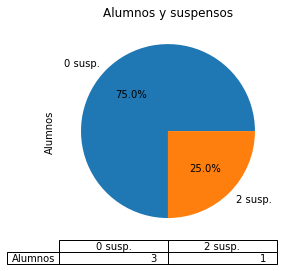

In [317]:
# Alumnos y suspensos
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True)
df2.to_frame()

,Alumnos
Nota,
"[0, 3)",0
"[3, 4)",0
"[4, 5)",0
"[5, 6)",0
"[6, 7)",1
"[7, 9)",3
"[9, 10)",0


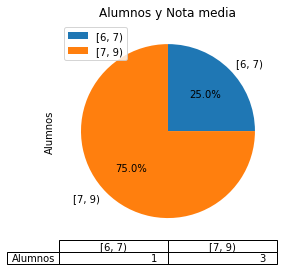

In [323]:
# Alumnos y suspensos
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True)
df2.to_frame()

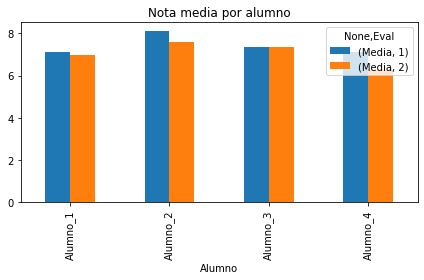

In [344]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
g1=df.plot.bar(title='Nota media por alumno') 
g1
g1.get_figure().savefig('g1.png')


In [12]:
f = open("acta_{}ev.md".format(ultima_evaluacion), "a")
texto = "{}".format(df.to_markdown())
texto += "\n\n ![](g1.png) \n "
f.write(texto)
f.close()


In [125]:
#actilla_final.groupby(['Alumno','Eval']).aggregate({'Nota':'mean', 'Suspenso':sum})
df=actilla_final[actilla_final.Suspenso ==1]
df = actilla_final.groupby(['Alumno','Eval']).aggregate({'Nota':'mean', 'Suspenso':sum})
df[df.Nota >= 8].count(level='Eval').Nota.rename({'Nota'})

Eval
1    1
2    0
Name: Nota, dtype: int64

In [ ]:
#actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
idx = pd.IndexSlice
lista_alumnos = actilla_final.groupby(['Alumno']).count().index

actilla_final.head()
actilla_final.groupby('Eval').aggregate({'Nota': 'mean','Suspenso': 'sum'}).unstack()['Nota']
#actilla_final.groupby('Eval').aggregate({'Nota': 'mean','Suspenso': 'sum'}).unstack()['Suspenso'].plot.bar(table=True)
actilla_final.groupby('Eval').aggregate({'Nota': 'mean','Suspenso': 'sum'})
df = actilla_final.pivot_table(index='Eval', aggfunc = {'Nota':'mean','Suspenso':sum,'Alumno':'nunique'})
df['Susp_alu'] = df.Suspenso / df.Alumno
df = df.rename(columns={'Alumno' : 'N_alum', 'Nota' : 'Media', 'Suspenso':'N_susp'})

df = np.round(df,1)
# display(df.to_html())
#display(md('**Resumen de resultados:**'))

df.to_markdown()
df


,N_alum,Media,N_susp,Susp_alu
Eval,,,,
1,4,7.4,1,0.2
2,4,7.1,2,0.5


In [ ]:
#df = actilla_final.drop(['Suspenso'], axis=1)
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]


df2 = pd.concat([df.set_index(['Alumno','Asignatura','Eval']).Nota.unstack('Asignatura').unstack('Eval'),df[df.Eval == 2].groupby('Alumno')[['Nota']].mean().rename(columns={'Nota': ('Nota','Media','2')})], axis=1).fillna('-').round(1).style.applymap(color_negative_red)

df2


In [ ]:
#df = actilla_final.drop(['Suspenso'], axis=1)
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]


df2 = pd.concat([df.set_index(['Alumno','Asignatura','Eval']).Nota.unstack('Asignatura').unstack('Eval'),df[df.Eval == 2].groupby('Alumno')[['Nota']].mean().rename(columns={'Nota': ('Nota','Media','2')})], axis=1).round(1)

#df2.style.format({('2FR II',2): lambda x: "±{:.0f}".format(x)})
#df2.style.format({('2FR II',2): lambda x: "{:.0f}".format(x)})
#df2.style.format("{:.0f}").format({('Nota','Media'):"{:.1f}"}).format("{:.2f}",subset=('Alumno_4',('BI',2))).applymap(color_negative_red).highlight_null("green")
df2.style.format("{:.0f}").format("{:.1f}",subset=(df2.index,df2.columns[-1:])).format("{:.1f}",subset=(df2.index[-1:],df2.columns)).applymap(color_negative_red).highlight_null("yellow")
#df2.style.set_na_rep("-").highlight_null("grey").format("{:.0f}")
df2.fillna('-').style.set_precision(0)

In [ ]:
%pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.0.2-py3-none-any.whl size=6592 sha256=486031d4a9229c668c4a698775dda54d31b5f35aa671889f6fd955a2c9fd9ccc
  Stored in directory: /home/hp/.cache/pip/wheels/ab/97/63/d1aaf14815a0c4979c0c231f25422414d2768d6919e1ffa443
Successfully built imgkit
Note: you may need to restart the kernel to use updated packages.


In [ ]:
html = df2.style.format("{:.0f}").format("{:.1f}",subset=(df2.index,df2.columns[-1:])).format("{:.1f}",subset=(df2.index[-1:],df2.columns)).applymap(color_negative_red).highlight_null("yellow").render()


In [ ]:
import imgkit
imgkit.from_string(html,'prueba.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [ ]:
df5[df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion]] 

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PS,PSC,QU
Eval,1,1,1,1,1,1,1,1,1,1
Alumno_1,8.000000,7.00,7.00,5.00,10.00,6.00,7.00,NaN,8.0,6.0
Alumno_2,7.000000,8.00,9.00,7.00,9.00,7.00,9.00,NaN,NaN,9.0
Alumno_3,8.000000,7.00,9.00,6.00,9.00,7.00,7.00,NaN,NaN,6.0
Alumno_4,NaN,7.00,8.00,3.00,7.00,7.00,10.00,8.0,NaN,7.0
Media,7.666667,7.25,8.25,5.25,8.75,6.75,8.25,8.0,8.0,7.0


In [ ]:
df5.style.set_table_styles([{'selector': 'td','props': [('border', '2px solid')]}, \
                            {'selector': 'tr','props': [('border', '2px solid')]}, \
                            {'selector': 'th','props': [('text-align', 'center')]}, \
                            {'selector': 'td','props': [('font-size', 'smaller')]} \
                           ], \
                          )

In [ ]:
df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'$\overline{x}$'})
df2

,$\overline{x}$
Eval,2
Alumno,
Alumno_1,7.000
Alumno_2,7.625
Alumno_3,7.375
Alumno_4,6.250


In [ ]:
imgkit.from_string(df5.style.format("{:.0f}").format("{:.1f}",subset=(df5.index,df5.columns[-1:])).format("{:.1f}",subset=(df5.index[-1:],df5.columns)).applymap(color_negative_red).highlight_null("white").set_na_rep('-').render(),'prueba.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [ ]:
pd.read_csv('importado2.csv', index_col=False)

,Nº,"Apellidos, Nombre",2FR II,BI,CTM,DT2,FIS,HE,IN II,LC2,MA2,PS,PSC,QU,RC,TI2,TIC,Nº MNS
0,1,Alumno_1,7.0,5,7,NaN,NaN,6,10,5,7,NaN,9.0,7,NaN,NaN,NaN,0
1,2,Alumno_2,8.0,7,8,NaN,NaN,7,9,7,8,NaN,NaN,7,NaN,NaN,NaN,0
2,3,Alumno_3,7.0,8,8,NaN,NaN,6,9,5,8,NaN,NaN,8,NaN,NaN,NaN,0
3,4,Alumno_4,NaN,7,7,NaN,NaN,2,8,6,10,2.0,NaN,8,NaN,NaN,NaN,2


In [ ]:
actilla_final

,Nº,"Apellidos, Nombre",Asignatura,Nota,Eval
0,1,Alumno_1,2FR II,8.0,1
1,2,Alumno_2,2FR II,7.0,1
2,3,Alumno_3,2FR II,8.0,1
4,1,Alumno_1,BI,7.0,1
5,2,Alumno_2,BI,8.0,1
...,...,...,...,...,...
40,1,Alumno_1,PSC,9.0,2
44,1,Alumno_1,QU,7.0,2
45,2,Alumno_2,QU,7.0,2
46,3,Alumno_3,QU,8.0,2


In [ ]:
from IPython.display import Markdown as md
#display("# Análisis de la %i"%ultima_evaluacion + "ª evaluación")
md("# Análisis de la %i"%ultima_evaluacion + "a evaluación")

# Análisis de la 2a evaluación

In [ ]:
# Añadimos la columna Suspenso
actilla_final['Suspenso']=0
# Si sale algún no presentado hay que ejecutar lo siguiente
#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)
actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1


## Datos generales

In [ ]:
actilla_final.head()

,Alumno,Asignatura,Eval,Nota,Suspenso
0,Alumno_1,2FR II,1,8,0
1,Alumno_2,2FR II,1,7,0
2,Alumno_3,2FR II,1,8,0
4,Alumno_1,BI,1,7,0
5,Alumno_2,BI,1,8,0


NameError: name 'md' is not defined

In [ ]:
#np.round(df,1).drop('N_alum', axis=1).plot.bar(subplots=True, figsize=(12,4), layout=(1,3));

In [ ]:
df = actilla_final.groupby(['Alumno','Eval','Asignatura'])[['Nota']].min().unstack().unstack().fillna('-').style.applymap(color_negative_red)
df.to_excel('styled.xlsx', engine='openpyxl')

In [ ]:
df = actilla_final[['Alumno','Eval','Asignatura','Nota']]


df.loc[:,'Nota']=df.loc[:,'Nota'].astype(int)
df[df.Eval <= evaluaciones_a_incluir].groupby(['Alumno','Eval','Asignatura'])[['Nota']].min().unstack().fillna('-').style.applymap(color_negative_red)

#df.set_index(['Alumno','Eval','Asignatura']), df.groupby(['Alumno','Eval','Asignatura'])[['Nota']].min()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df1=actilla_final.groupby(['Alumno','Eval','Asignatura'])[['Nota']].max().unstack().unstack()
df1.fillna('-').style.applymap(color_negative_red)


In [ ]:
#df2 = actilla_final.pivot_table(index=['Alumno','Eval'], aggfunc = {'Nota':'mean','Suspenso':sum})
df2 = actilla_final.pivot_table(index=['Alumno','Eval'], aggfunc = {'Nota':'mean'})
#df2.sort_values('Nota')
df2.unstack()[('Nota',2)]
#actilla_final.pivot_table(index=['Alumno','Eval']).Nota.round(2)

Alumno
Alumno_1    7.000
Alumno_2    7.625
Alumno_3    7.375
Alumno_4    6.250
Name: (Nota, 2), dtype: float64

In [ ]:
pd.concat([df1,df2.unstack()[('Nota',2)]],axis=1)

,"(Nota, 2FR II, 1)","(Nota, 2FR II, 2)","(Nota, BI, 1)","(Nota, BI, 2)","(Nota, CTM, 1)","(Nota, CTM, 2)","(Nota, HE, 1)","(Nota, HE, 2)","(Nota, IN II, 1)","(Nota, IN II, 2)",...,"(Nota, LC2, 2)","(Nota, MA2, 1)","(Nota, MA2, 2)","(Nota, PS, 1)","(Nota, PS, 2)","(Nota, PSC, 1)","(Nota, PSC, 2)","(Nota, QU, 1)","(Nota, QU, 2)","(Nota, 2)"
Alumno,,,,,,,,,,,,,,,,,,,,,
Alumno_1,8.0,7.0,7.0,5.0,7.0,7.0,5.0,6.0,10.0,10.0,...,5.0,7.0,7.0,NaN,NaN,8.0,9.0,6.0,7.0,7.000
Alumno_2,7.0,8.0,8.0,7.0,9.0,8.0,7.0,7.0,9.0,9.0,...,7.0,9.0,8.0,NaN,NaN,NaN,NaN,9.0,7.0,7.625
Alumno_3,8.0,7.0,7.0,8.0,9.0,8.0,6.0,6.0,9.0,9.0,...,5.0,7.0,8.0,NaN,NaN,NaN,NaN,6.0,8.0,7.375
Alumno_4,NaN,NaN,7.0,7.0,8.0,7.0,3.0,2.0,7.0,8.0,...,6.0,10.0,10.0,8.0,2.0,NaN,NaN,7.0,8.0,6.250


In [ ]:
pd.concat([df1, df2], axis=1).unstack().fillna('-').style.applymap(color_negative_red)

TypeError: Expected tuple, got str

In [ ]:
pd.concat([df1, df2], axis=1).fillna('-').style.applymap(color_negative_red)

TypeError: Expected tuple, got str

## Nota media por asignatura

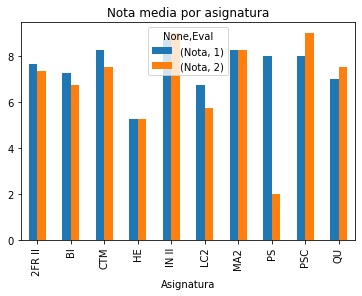

In [ ]:
display(md("## Nota media por asignatura"))
df2 = actilla_final.pivot_table(index=['Asignatura','Eval'], aggfunc = {'Nota':'mean'})
#display(df2.unstack().plot.bar())
p1 = df2.unstack().plot.bar(title='Nota media por asignatura').get_figure()
p1.savefig('media_asignatura.jpg')
df2.unstack().fillna('-').style.applymap(color_negative_red)
#df[df[]]
#actilla_final

## Suspensos por asignatura

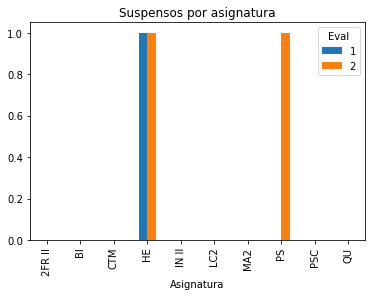

In [ ]:
display(md("## Suspensos por asignatura"))
df=actilla_final.pivot_table('Suspenso',index=['Asignatura'],columns='Eval',aggfunc='sum')
p2 = df[df[ultima_evaluacion]>=0].plot.bar(title='Suspensos por asignatura').get_figure()
p2.savefig('suspensos_asignatura.png')
#df[df[]]
#actilla_final

In [ ]:
#display(md("## Nota media por alumno"))
df2 = actilla_final.pivot_table(index=['Alumno','Eval'], aggfunc = {'Nota':'mean'})
#display(df2.unstack().plot.bar())
#p1 = df2.unstack().plot.barh(title = 'Nota media por alumno').get_figure()
#p1.savefig('alumno_asignatura.jpg')
#df2.unstack().fillna('-').style.applymap(color_negative_red)
#df2.unstack().fillna('-')


In [ ]:
# actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso > 0)][['Alumno','Suspenso']].groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

In [ ]:
#display(md("## Número de alumnos con suspensos"))

# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)
#display(df3)

#df3.plot.barh()




In [ ]:
#df[(df.Alumno==df2[df2.Suspenso==df3.index[0]].index[0]) & (df.Suspenso > 0)]

In [ ]:
display(md("## Alumnos suspensos"))

for i in df3[df3.index> 0].index :
    print(f'Con {i} asignatura:')
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')


## Alumnos suspensos

Con 2 asignatura:
  Alumno_4 ( HE, PS )


In [ ]:
display(md("## Evolución de nota media y suspensos"))

actilla_final.pivot_table(index=['Alumno','Eval'], aggfunc = {'Nota':'mean','Suspenso':'sum'}).unstack()

## Evolución de nota media y suspensos

Nota        Suspenso   
Eval             1      2        1  2
Alumno                               
Alumno_1  7.111111  7.000        0  0
Alumno_2  8.125000  7.625        0  0
Alumno_3  7.375000  7.375        0  0
Alumno_4  7.125000  6.250        1  2

In [ ]:
%%capture
%%writefile noprompts.tplx

% extend the default article template:
((* extends 'article.tplx' *))

% display input without prompts:
((* block input scoped *))
\begin{Verbatim}[commandchars=\\\{\}]
((( cell.source | highlight_code(strip_verbatim=True) )))
\end{Verbatim}
((* endblock input *))

% treat execute_result (output with prompt) as display_data (output without prompt)
((* block execute_result scoped *))
    ((* block display_data scoped *))
        ((( super() )))
    ((* endblock display_data *))
((* endblock execute_result *))

In [ ]:
%%capture
#!jupyter nbconvert Prueba.ipynb --to=pdf  --PDFExporter.latex_command=['xelatex', '{filename}'] --TemplateExporter.exclude_input=True --template noprompts
#!jupyter nbconvert acta_evaluacion_1819.ipynb --to=pdf  --TemplateExporter.exclude_input=True --template noprompts
!jupyter nbconvert est_evaluacion_1819.ipynb --to=pdf  --TemplateExporter.exclude_input=True --template noprompts


In [ ]:
#actilla_final[actilla_final.Eval==3].groupby(['Alumno','Eval','Asignatura'])[['Nota']].max().unstack()